<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
diff = np.float32(12.123452) - np.float32(12.123450)
valor_real = 0.000002
error = abs(diff-valor_real)/ valor_real*100
print(error)
#(12.123452/valor_real)*1/(2**31)

1.9073486e-06
4.632568359374996


In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [ ]:
def exponencial(x,n): # Dado u x, con n iteracciones calcule e^(-x)
  exp = 0 # Inicia variable
  for i in range(n):
    exp += (-1)**i * x**i / factorial(i)
  return exp

In [ ]:
x = 0.1
n = 100
el = exponencial(x,n)
e_exact = np.exp(-x)
print(f"{el}\n{e_exact}")

0.9048374180359596
0.9048374180359595


In [ ]:
def exponencial_truncado(x,n):
  ex = exponencial(x,n)
  tresh = abs(1e-7*ex)
  exp_ = 0
  for i in range(n):
    exp_ = abs((-x)**(i+1)/factorial(i+1) )
    if exp_ <= tresh:
      break
  exp1 = exponencial(x,i)
  return exp1, i

In [ ]:
x = 0.15
n = 100
exacto = np.exp(-1)
print(f"Valor de la serie:{exponencial(x,n)}")
print(f"Valor de la serie truncada: {exponencial_truncado(x,n)}")
print(f"Valor exacto: {exacto}]")

Valor de la serie:0.8607079764250578
Valor de la serie truncada: (0.86070859375, 5)
Valor exacto: 0.36787944117144233]


In [ ]:
def invertida(x,n): # e^(-x) = 1/e^(x) donde e^(x) = x^(n)/n! sum(n=0 hasta n=N )
  exp = 0
  for i in range(n):
    exp += x**i / factorial(i)
  return 1/ exp

In [ ]:
x = 0.15
n = 100
exacto = np.exp(-1)
print(f"Valor de la serie:{exponencial(x,n)}")
print(f"Valor de la serie invertidas: {invertida(x,n)}")
print(f"Valor exacto: {exacto}]")

Valor de la serie:0.8607079764250578
Valor de la serie invertidas: 0.860707976425058
Valor exacto: 0.36787944117144233]


In [ ]:
n = 100
N = np.arange(1,n,1)
x = 10
exp1_ = np.zeros(len(N))
exp2_ = np.zeros(len(N))
for i,n in enumerate(N):
  exp1_[i] = exponencial(x,n)
  exp2_[i] = invertida(x,n)


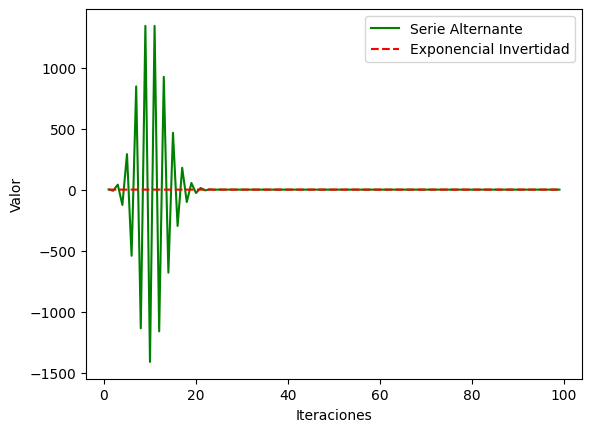

In [ ]:
plt.figure()
plt.plot(N, exp1_, "g-", label = "Serie Alternante")
plt.plot(N, exp2_, "r--", label = "Exponencial Invertidad")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Valor")
plt.show()

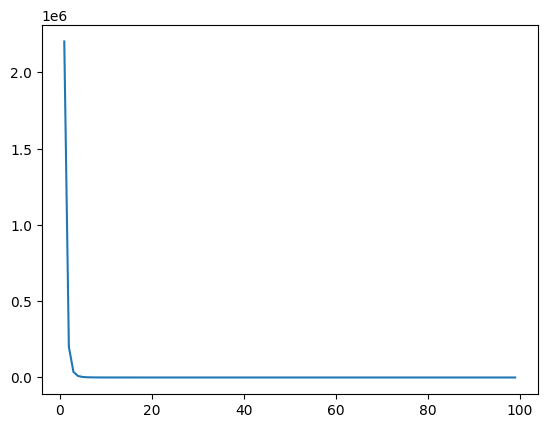

In [ ]:
x = 10
exacto = np.exp(-x)
error = abs(exp2_ - exacto)/ exacto * 100
plt.plot(N,error)

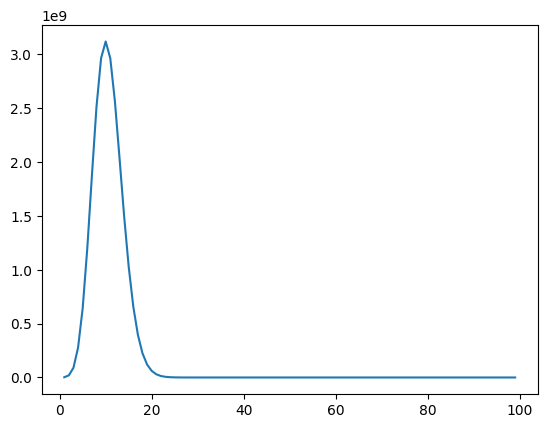

In [ ]:
x = 10
exacto = np.exp(-x)
error = abs(exp1_ - exacto)/ exacto * 100
plt.plot(N,error)

A partir de lo realizado se concluye lo siguiente:


*   La serie invertidad converge màs rapido, por ello es mejor series que no sean alternentes
*   La serie exponencial truncada, perimite determinar en que iteraccion la serie alternante converge
*   Entre màs pequeño sea x màs grande es el error en la serie alternante



## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
def s_1(N):
  n = np.arange(1,N+1)
  sum = np.sum((((-1)**n) * n) / (n+1))
  return sum

In [159]:
def s_2(N):
  n = np.arange(1,N+1)
  sum = 0
  sum1 = np.sum((2*n-1)/(2*n))
  sum2 = np.sum((2*n)/(2*n+1))
  sum = sum2 - sum1
  return sum1

In [160]:
def s_3(N):
  n = np.arange(1,N+1)
  sum = np.sum( 1/((2*n)*(2*n+1)))
  return sum

In [161]:
n = 10
N = np.arange(1,n+1)
s_1_ = np.zeros(len(N))
s_2_ = np.zeros(len(N))
s_3_ = np.zeros(len(N))
for i,n in enumerate(N):
  s_1_[i] = s_1(n)
  s_2_[i] = s_2(n)
  s_3_[i] = s_3(n)

In [170]:
s_3(10000)

0.3068278213149296

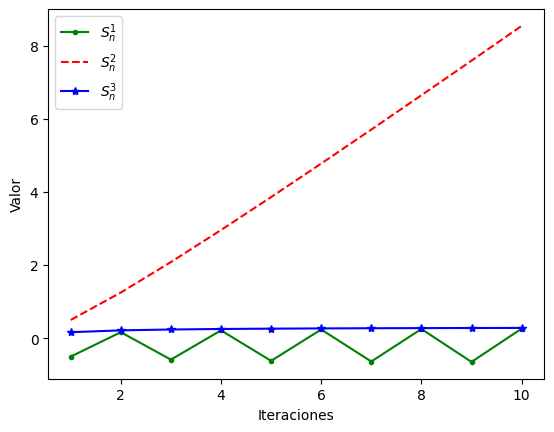

In [162]:
plt.figure()
plt.plot(N, s_1_, "g.-", label = "$S^1_{n}$")
plt.plot(N, s_2_, "r--", label = "$S^2_{n}$")
plt.plot(N, s_3_, "b*-", label = "$S^3_{n}$")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Valor")
plt.show()

In [163]:
def E(n):
  e1 = abs((s_1(n)-s_3(n))/s_3(n))
  e2 = abs((s_2(n)-s_3(n))/s_3(n))
  log10_e1 = np.log10(e1)
  log10_e2 = np.log10(e2)
  return log10_e1,log10_e2

In [164]:
n = 1e5
N = np.arange(1,n+1)
s_1_ = np.zeros(len(N))
s_2_ = np.zeros(len(N))
for i,n in enumerate(N):
  s_1_[i], s_2_[i] = E(n)

In [165]:
log_n = np.log(N) # Log_10 de cada elemento de N que es el intervalo
# Asi tengo el log_10 para cada interaccion (n) donde despues lo comparo con el error relativo en n iteraciones

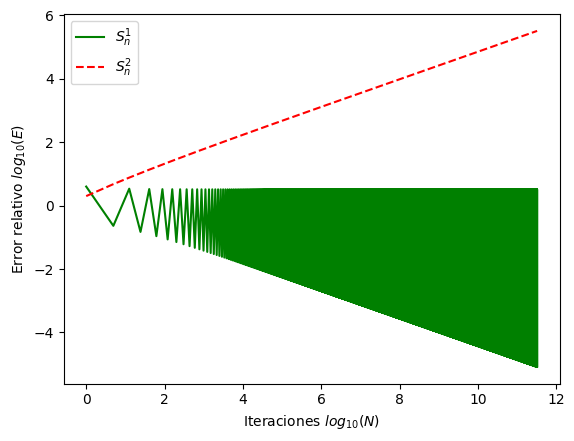

In [166]:
plt.figure()
plt.plot(log_n, s_1_, "g-", label = "$S^1_{n}$")
plt.plot(log_n, s_2_, "r--", label = "$S^2_{n}$")
plt.legend()
plt.xlabel("Iteraciones $log_{10}(N)$")
plt.ylabel("Error relativo $log_{10}(E)$")
plt.show()



*   $S^2_N$ tiene un mayor error relativo cada vez más grande, es decir, se aleja cada cez más del valor exacto que es $S^3_N$.
*   Aunque para $S^1_N$, el error relativo no crece tanto, tampoco converge a $S^3_N$, si no mas bien se acerca al valor exacto y a laa iteraccion siguiente se aleja, lo cual tiene sentido debido a que es una serie alternante.
*   $S^3_N$ Converge muy rapido, es decir, tiende a un valor con muy pocas iteracciones.
